
### Background

Much investigation is carried out to predict the annual energy production (AEP), and Cost of Energy (COE) of wind farms in assessment of the viability of wind energy projects. Wind farm layout design is a multidisciplinary process with many design variables. Aerodynamic parameters including wind speed and direction are  characterized by much uncertainty. However in some simulations these uncertainties are not apropriately accounted for, resulting in energy underproduction in the operational lifetimes of farms. To develop more robust models the afore mentioned design variables must be properly described to present a near real life situation. An understanding, and proper treatment of these uncertainties will greatly aid in the realization of more robust farm layout designs, ultimately improving the accuracy of annual power output predictions. 


### Example 1: AEP  calculation with uncertainty in wind speed

The amount of wind energy converted into electrical energy by a wind farm is primarily dependent on the wind speed which is greatly reduced in wake regions. These are regions downstream of turbines where the wind speed is significantly less than the free stream; caused by a reduction in momentum. Kinematic models obtained from solving the momentum equations are used to estimate the hub velocity of downstream turbines. One of the oldest of such models, created by N.O. Jensen [4] is used in this work to estimate the wake effects and calculate the effective hub velocities. It is a simple wake model and relatively ease of implement. The Jensen wake model assumes a linearly expanding wake with a velocity deficit that is only dependent of* the distance behind the rotor.




The wake diameter $D_w$ increases in the flow velocity*. It and* is a function of the downstream distance from the rotor, and is given by

\begin{equation}
D_w = D(1 + 2ks)
\end{equation}

where $k$ is the wake decay constant with a typical value of 0.075 for land* cases, and $s$ the relative distance behind the rotor defined as $s = x/D$. The velocity in the wake is then given by

\begin{equation}
u = U_{\infty}\Bigg[1 - \frac{1-\sqrt{1-C_T}}{(1+2ks)^2}\Bigg].
\end{equation}

$C_T$ is the thrust coefficient of the rotor which is ususally* smaller than 1. The reader is refered to [3] for a detailed description of the Jensen wake model used in this paper.

We proceed by considering the power of a wind farm to be a function of three classes of variables: uncertain variables *$\zeta$, design variables $x$, and parameters $\theta$, $ P = P(\zeta, x, \theta)$.

  
|   |   |
|:---:|:---:|
| **Design, $x,y$:** | turbine locations x, and y |
| **Uncertain variables, $\boldsymbol{\zeta}$:** | wind, speed and direction |
| **Parameters, $\theta$:** | yaw angles, turbine characteristics, and wake model parameters|



Uncertain variables are those that follow some form of probability distribution, design variables are variables that an optimizer can vary, and parameters are constants. The classification of the variables is problem dependent. For instance, the height of a turbine could be considered as a design variable if we allow the optimizer to vary it, as an uncertain variable if we assume that due to terrain or manufacturing variability the exact height is unknown but follows a particular probability distribution, or as a parameter if we set the turbine height in the model at a fixed value. Another example is the rotor yaw, which can be considered a design variable or a parameter. A tunable parameter of a wake model, such as the wake coefficient expansion, could be
considered as a parameter or as an uncertain variable given by a particular distribution [1].
Table 1 lists the category of each variable that influences the power computation in this work. 

The total power generated in a wind farm for a specified set of flow conditions (wind direction and speed, air density, etc.) is equal to the sum of the power produced by each turbine

\begin{equation}
 P = \sum_{i=1}^{n_{turb}} P_{i} 
\end{equation}

with the power of each turbine calculated as,

\begin{equation}
 P_{i} = \frac{1}{2}\rho C_P A U_{i}^{3} 
\end{equation}

where $\rho$ is the air density, $A$ is the rotor swept area, $C_P$ is the power coefficient, and $U_i$ is the effective hub velocity for each turbine, which is deteremined from the wake model and is a function of the three types of variables described above.


In [1]:
import numpy as np

"""the jensen wake model"""

def Jensen_wake(x,y, U):
    
    k = 0.075      # wake decay constant
    D = 126.4      # rotor diameter
    Ct = 0.8       # thrust coefficient
    
    s = x/D        # relative distance downwind 
    
    Dw = D* (1. + 2.*k*s)               # wake diameter
       
    U_hub = U*(1. - (1. - np.sqrt(1. - Ct))/(1. + s*k*s)**2)          # hub velocity
    
    return U_hub

#### Farm Layout

As a first, and simple case we will calculate the total power of a simplified wind farm with only four turbines arranged in a $2 \times 2$ gird with a spacing of 3 turbine rotor diameters. The prevailing wind direction is due west as indicated by the red arrows in the figure below. *This is just for illustrative puroposes...


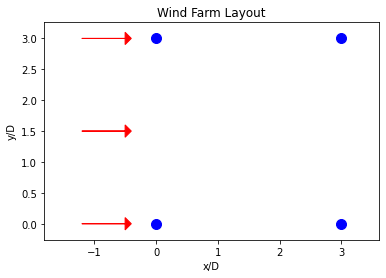

In [2]:
"""layout visualization"""

import matplotlib.pyplot as plt

D = 126.4          # rotor diameter

x = np.array([0., 3.*D, 3.*D, 0.])            # turbine x and y locations
y = np.array([0., 0., 3.*D, 3.*D])

plt.figure()
ax = plt.axes()
ax.arrow(-1.20, 3, .7, 0., head_width=.2, head_length=.10, fc='r', ec='r')
ax.arrow(-1.20, 1.5, .7, 0., head_width=.2, head_length=.1, fc='r', ec='r')
ax.arrow(-1.20, 0, .7 ,0., head_width=.2, head_length=.10, fc='r', ec='r')

# plt.figure()
plt.plot(x/D, y/D, "bo", markersize=10)
plt.axis('equal')
plt.xlabel("x/D")
plt.ylabel("y/D")
plt.title("Wind Farm Layout")
plt.show()

In [4]:
""" Power calculation """

import numpy as np

def jensen_power(x, y, U):
    
    rho = 1.1716                   # air density   
    a = 1. / 3.                    # axial induction
    Cp = 4.*a*(1-a)**2.            #power coefficient
    
    D = 126.4
    
    r0 = D/2.

    A = np.pi*r0**2        #  rotor swept area
    
    U_hub1 = np.zeros(len(x))
    Power = np.zeros(len(x))
    
    
    U_hub1[0] = U
    U_hub1[1] = Jensen_wake((x[1]-x[0]), (y[1]-y[0]), U)
    U_hub1[2] = Jensen_wake((x[2]-x[3]), (y[2]-y[3]), U)
    U_hub1[3] = U
    
    # Calculate power from each turbine
    for i in range(len(U_hub1)):
        
        Power[i] = 0.5*rho*Cp*A*U_hub1[i]**3
           
    return Power

U = 8.

print("Power:", jensen_power(x,y, U), "W")


Power: [2230280.95623081 1154678.1330182  1154678.1330182  2230280.95623081] W


The power from each from each of the four turbines is printed above. Due to the symmetry (and simplicity) of this problem we see that power from the two leftmost turbines is identical as is that from the two downwind (rightmost) ones. The lower power in the latter case is an indication of wake effects previously mentioned.

We however need more information to meaningfully calculate the AEP since it is a function of the expected power.
Mathematically given as,

\begin{equation}
AEP = 8760\frac{hr}{yr} E[P(\boldsymbol{\zeta})]\\
where \quad \quad E[P(\boldsymbol{\zeta})] =  \int _{\Omega} P(\boldsymbol{\zeta}) \rho(\boldsymbol{\zeta}) d\boldsymbol{\zeta}
\end{equation}

where $\boldsymbol{\zeta} = (\zeta_1 , \zeta_2 , . . . , \zeta_n)$ is a vector of random variables (the uncertain variables), $\rho(\boldsymbol{\zeta}) = \prod_{k=1}^{n} \rho_k (\zeta_k)$ is the joint probability density function of the uncertain variables, which we assume to be independent, $\Omega$ is the domain of the uncertain variables, and $P$ is the power produced in the wind farm. Common uncertain variables are the wind direction and the freestream wind speed. 

We now perform a direct calculation of the AEP using a constant wind speed of $8~ ms^{-1}$ all year round, and the assumption that flow is from this single direction.



In [5]:
"""direct AEP calculation"""

Powers = jensen_power(x, y, U)
# print Powers
Average_Power = np.mean(Powers)

AEP = 8760 * Average_Power/1e9
              
print(AEP, "GWh")

14.826120810910648 GWh



In reality however the wind speed is characterized by variability, and is typically modelled with a Weibull distribution. In this problem we use a truncated Weibull distribution with a minimum speed of $0~m_s^{-1}$, a maximum of $40 m/s$ and an average speed of approximately $8~m_s^{-1}$. The shape and scale factors here are 9.0, and 1.8 respectively.

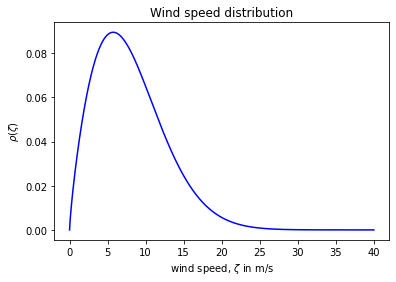

In [6]:
# Weibul distribution

def weibull(a, b, x1):
    a = 1.8              # scale factor
    b = 9.0              # shape factor

    
#     lo = 0.0
#     hi = 40.0  
    
    F = 1 - np.exp(-(x1/b)**a)   # cdf
    
    f = a/b * (x1/b)**(a-1) * np.exp(-(x1/b)**a)  # pdf
    
#     bnd = [lo, hi]

    return f #, F


x1 = np.linspace(0., 40., 1000)
plt.figure()
plt.plot(x1, weibull(1.8,12.55, x1),'b-')
plt.xlabel('wind speed, $\zeta$ in m/s')
plt.ylabel('$\\rho(\zeta)$')
plt.title('Wind speed distribution')
plt.show()

# f = Weibull(1.8,12.55,0.0, 40.0, x1)
# print f.sample(20)

We will first do a quick Monte Carlo simulation for an accurate baseline AEP to compare our results with. We can see from the convergence plot below that a $100000$ samples [using Hammersley sampling](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.552.864&rep=rep1&type=pdf) will be sufficient for this analysis.

<img src="Monte%20Carlo%20AEP%20convegence.jpg">

In [14]:
import chaospy  as cp

dist = cp.Weibull(1.8, 9.0, 0.) # wind speed distribution

U_inf = dist.sample(100000, "M")

solves = np.zeros((len(U_inf), len(x)))
mu_mc = np.zeros(len(U_inf))

for i in range(len(solves)):
    solves[i,:] = jensen_power(x,y, U_inf[i])# for s in U_inf]
    mu_mc[i] = np.mean(solves[i,:])

# print solves

AEP_mc = 8760*np.mean(mu_mc)/1e9, "GWh"

print(AEP_mc)

(31.740959536057538, 'GWh')


Next we calculate the AEP with polynomial chaos expansions. The power will be approximated with a polynomial as

\begin{equation}
P(\zeta) \approx \sum_{i=0}^{n}\alpha_i \phi_i (\zeta)
\end{equation}

where $\alpha_i$ are the expansion coefficients, and $\phi_i$ orthogonal polynomials with respect to the pdf of the uncertain variable; the wind speed in this case. The mean power $E[P(\zeta)] = \alpha_0$, the first expansion coefficient. The $AEP$ will then be calculated as

\begin{equation}
AEP = E[P(\zeta)] \times \frac{hours}{year}
\end{equation}

We will calculate the expansion coefficients using both methods discussed in [1] $-$ quadrature, and regression.

In [15]:
# Quadrature

order = 5

poly = cp.orth_ttr(order, dist)
nodes, weights = cp.generate_quadrature(order+1, dist, rule="G")

solves1 = [jensen_power(x, y, s) for s in nodes.T]
P_hat1 = cp.fit_quadrature(poly, nodes, weights, solves1)

mu_quad = cp.E(P_hat1, dist)     # mean from the quadrature method

AEP_quad = 8760*np.mean(mu_quad)/1e9

print(AEP_quad,": GWh")

# Regression

nodes2 = dist.sample(3*len(poly), "H")

solves2 = [jensen_power(x,y, s) for s in nodes2.T]
P_hat2 = cp.fit_regression(poly, nodes2, solves2)#,rule="T")

mu_reg = cp.E(P_hat2, dist)     # mean from regression

AEP_reg = 8760*np.mean(mu_reg)/1e9

print(AEP_reg,": GWh")

31.76135954133397 : GWh
31.761359553406674 : GWh


The AEP's calculated using both methods are identical since it is a function of the mean power (the first expansion coefficient) which we calculated from the same polynomial expansion.



### Discussion

The table below gives a summary of the results obtained from the different methods. The vast difference between  the direct and probabilistic results supports our initial viewpoint of considering uncertainties in creating robust engineering models for wind energy applications (basically in all real life applications). 


|**Method**| **AEP (GWh) **|
|:---:|:---:|
|Direct calculation| 14.826 |
|Monte Carlo| 31.754 |
|PC_regression| 31.761 |
|PC_quadrature|  31.761 |

We can see a strong agreement between the Monte Carlo and polynomial chaos computations. 
The AEP caluculated without regard for uncertainty is however significantly lower. This is largely due to the farm layout used in this analysis. A larger wind farm with turbines more spread out will show results from all methods in better agreement. A more instructive study would involve an optimization of position, or yaw for AEP (or COE). Also an aanalysis involving uncertainties in wind direction would be mnore insightful.



### References

[1] A. Santiago Padrón, PJ Stanley, Jared Thomas, Juan J. Alonso, and Andrew Ning: Polynomial chaos to  efficiently compute the annual energy production in wind farm layout optimization, 2017.

[2] Jonathan Feinberg,Hans Petter Langtangen: Theory Guide to Chaospy: Non-intrusive Polynomial Chaos Expansion in Python, 2015.

[3] Douwe J. Renkema. Validation of wind turbine wake models: Using wind farm data and wind tunnel measurements (master’s thesis), Delft University of Technology,2007.

[4] Jensen, N. O.: A note on wind generator interaction, Risø-M-2411 Risø National Laboratory Roskilde, pp. 1–16, https://doi.org/Riso-M-2411, http://www.risoe.dk/rispubl/VEA/veapdf/ris-m-2411.pdf, 1983.